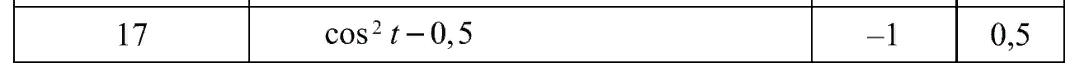

In [ ]:
import math
import numpy as np
import random

def F(t): return round ((math.cos(t)**2)-0.5, 4) #фун-ия по заданию варианта

# Вычисление RBF в каждом нейроне
def RBF(t, c):
    a=math.pow((c-t),2)
    b= 2*math.pow(sigma,2)
    num=-a/b
    return math.exp(num)

#Гиперпараметры
J=9 #кол-во нейроно в слое
sigma=0.1
K=1000
eta=0.6#норма обучения (0,1]

# Параметры набора данных
Q=20#размер обучающей выборки
a, b = -1, 0.5 #интервал
#Генерация набора данных
coords_x=list(np.linspace(a, b, num=Q))
coords_y=[F(i) for i in coords_x]


c=[0]*J#создаем центры
phi=[0]*J#создаем значения RBF нейрона
y=[0]*Q#создание ожидаемых значений
# Вычисление центров для каждого нейрона
for j in range(1,J+1):
    c[j-1]=a+j*(b-a)/(J+1)

v=[random.randint(0,10) for i in range(J)]#создание случайных веса


for k in range(K):#прогон по эпохам
    for q in range(Q):#прогон по набору данных
        t=coords_x[q]
        for j in range(J):
            phi[j]= RBF(t, c[j])

        yy=0
        # Нейрон с линейной функцией активации
        for j in range(J):
            yy+=v[j]*phi[j]

        y[q]=yy


        # Корректировка весов по правилу Видроу-Хоффа(обучение)
        err=coords_y[q]-y[q]
        delta_v=[]
        for j in range(J):
            delta_v.append(eta*err*phi[j])
            v[j]=v[j]+delta_v[j]


print(v)
# подключаем модуль для графиков
import plotly.graph_objs as go
# строим графики
fig = go.Figure()
fig.add_trace(go.Scatter(x=coords_x, y=coords_y, mode='lines+markers', name = "Реальные"))
fig.add_trace(go.Scatter(x=coords_x, y=y, mode='lines+markers', name = "Предсказанные"))
fig.update_traces(hoverinfo="all", hovertemplate="X: %{x}<br>Y: %{y}")
fig.update_layout(xaxis_title="Время t",yaxis_title="Значение")
fig.show()# выводим графики в браузер

[-0.11894673384601184, 0.08245304240388696, 0.13699401994485508, 0.19443060604091164, 0.30419847404772044, 0.2413108326313795, 0.3904704569780866, 0.155765148576032, 0.40068978864177657]


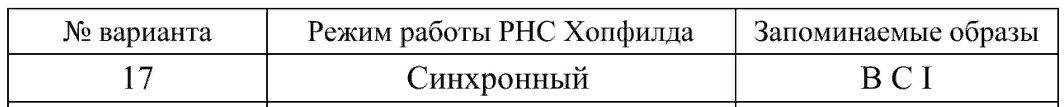

In [ ]:
def mul_vector_vectorT(v):
    w=[]
    for i in v:
        vector=[]
        for j in v:
            vector.append(i*j)
        w.append(vector)
    return w

def summator(m1, m2):
    new_m=[]
    for v1, v2 in zip(m1, m2):
        vector=[]
        for x1, x2 in zip(v1, v2):
            vector.append(x1+x2)
        new_m.append(vector)
    return new_m

def mul_matrix_num(matrix, num):
    new_matrix=[]
    for vector in matrix:
        new_vector=[]
        for x in vector:
            new_vector.append(round(x*num, 2))
        new_matrix.append(new_vector)
    return new_matrix

def zero_diagonal(matrix):
    for i in range(len(matrix[0])):
            matrix[i][i] = 0
    return matrix


def memorization(X): #Формирование весов
    l=len(X[0])

    W = [[0]*l for _ in range(l)] #создание нулевой матрицы

    for x in X:
        w = mul_vector_vectorT(x)
        W = summator(W, w)

    W=mul_matrix_num(W, 1/l)
    W=zero_diagonal(W)
    return W


def scalar_product_vectors(vector1, vector2):#find dot product
    summa=0
    for v1, v2 in zip(vector1, vector2):
        summa+=v1*v2
    return round(summa, 2)

def mul_matrix_vectorT(matrix, vector):
    new_vector=[]

    for vec in matrix:
        scalar=scalar_product_vectors(vec, vector)
        new_vector.append(scalar)
    return new_vector

def sign(x):

    for i in range(len(x)):
        x[i]= -1 if x[i]<=0 else 1
    return x


def draw(x):
    size=5
    splitted_list = lambda x, y: [x[i:i+y] for i in range(0, len(x), y)]
    X=splitted_list(x, size)
    for i in X:
        for j in i:
            print('█' if j==1 else ' ', end='')
        print()
    print()

x=[[1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1],
   [1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1],
   [1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1]]



W = memorization(x)

t=[1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1]
# t=[-1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1]
# t=[1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

print('Ввели')
draw(t)

y=mul_matrix_vectorT(W, t)
y=sign(y)

#просматривает с каким рисунком совпадает
for i in range(len(x)):
    if x[i] == y:
        print('Похоже')
        draw(x[i])
print()

Ввели
████ 
██  █
████ 
    █
████ 

Похоже
████ 
█   █
████ 
█   █
████ 




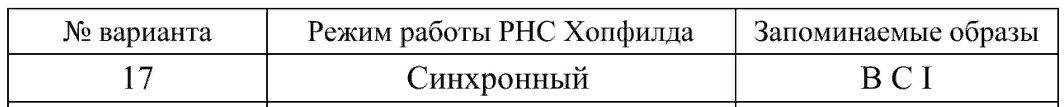

In [ ]:
def mul_2vector_matrix(vec1, vec2): #векторным произведением или кросс-произведением
    matrix=[]
    for v1 in vec1:
        vector=[]
        for v2 in vec2:
            vector.append(v1*v2)
        matrix.append(vector)
    return matrix

def sum_2matrix_matrix(m1, m2):
    new_m=[]
    for v1, v2 in zip(m1, m2):
        vector=[]
        for x1, x2 in zip(v1, v2):
            vector.append(x1+x2)
        new_m.append(vector)
    return new_m

def scalar_product_vectors(vector1, vector2):#find dot product
    summa=0
    for v1, v2 in zip(vector1, vector2):
        summa+=v1*v2
    return round(summa, 2)


def mul_matrix_vectorT(matrix, vector):
    new_vector=[]

    for vec in matrix:
        scalar=scalar_product_vectors(vec, vector)
        new_vector.append(scalar)
    return new_vector

def sign(x):
    for i in range(len(x)):
        x[i]= -1 if x[i]<=0 else 1
    return x

def transpose (matrix):
    new_matrix=[]
    for i in range(len(matrix[0])):
        vector=[]
        for vec in matrix:
            vector.append(vec[i])
        new_matrix.append(vector)
    return new_matrix

def draw(x, n):
    size=n
    splitted_list = lambda x, y: [x[i:i+y] for i in range(0, len(x), y)]
    X=splitted_list(x, size)
    for i in X:
        for j in i:
            print('█' if j==1 else ' ', end='')
        print()
    print()


X=[[1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1],
   [-1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1],
   [1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1]]

Y=[[1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1],
   [1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1],
   [1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1]]


#Настройка весов
W = [[0]*len(X[0]) for _ in range(len(Y[0]))] #создание нулевой матрицы
for v1, v2 in zip(Y, X):
    w = mul_2vector_matrix(v1, v2)
    W = sum_2matrix_matrix(W, w)


print('*'*10, 'Искаженный большой вектор на мальникий вектор', '*'*10)
XX=[1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1]
# XX=[-1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1]
# XX=[1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1]
print("Вход")
draw(XX, 7)
v=mul_matrix_vectorT(W, XX)
out = sign(v)
print("Выход")
draw(out,5)

print('*'*10, 'Искаженный мальникий вектор на большой  вектор', '*'*10)
# yy=[1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1]
# yy=[1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1]
yy=[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1]
print("Вход")
draw(yy, 5)
W=transpose(W)
v=mul_matrix_vectorT(W, yy)
out = sign(v)
print("Выход")
draw(out,7)

********** Искаженный большой вектор на мальникий вектор **********
Вход
███████
█      
█     █
██████ 
█     █
█     █
██████ 

Выход
████ 
█   █
████ 
█   █
████ 

********** Искаженный мальникий вектор на большой  вектор **********
Вход
█████
     
  █  
  █ █
█████

Выход
███████
   █   
   █   
   █   
   █   
   █   
███████



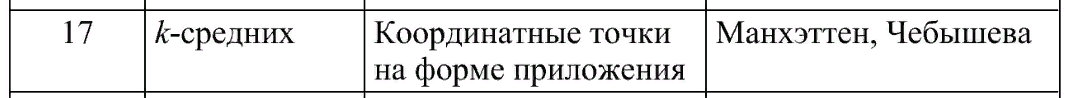

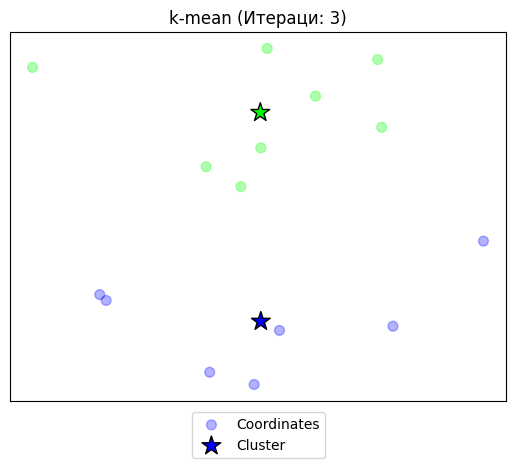

In [ ]:
import random
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
import math

def generate_points(center_x, center_y, radius, num_points):
    points = []
    for i in range(num_points):
        theta = random.uniform(0, 2*math.pi)
        noise = radius + random.uniform(-10, 10)
        x = round(center_x + noise * math.cos(theta), 2)
        y = round(center_y + noise * math.sin(theta), 2)
        points.append((x,y))
    return points

XY=[]
XY.extend(generate_points(5,5, 3 ,5))
XY.extend(generate_points(7,7, 3 ,5))
XY.extend(generate_points(3,3, 3 ,5))
random.shuffle(XY)


k=2

def draw(cluster, belonging, i):
  clear_output(wait = True)
  plt.title(f'k-mean (Итераци: {i})')
  plt.xticks([])
  plt.yticks([])
  size=200
  points=sum(belonging.values(), [])
  belonging=sum([[k]*len(belonging[k]) for k in belonging.keys()], [])

  x,y=map(list, zip(*points))
  plt.scatter(x, y, marker='.', s = size, c=belonging, cmap='brg', label='Coordinates', alpha=0.3)
  x,y=map(list, zip(*cluster))
  plt.scatter(x, y, marker='*', s = size, c=range(len(x)), cmap='brg', label='Cluster', edgecolors= 'k')
  plt.legend(bbox_to_anchor=(0.65, -0.01))
  plt.show()

def calculate_cluster(cluster):
  sumX=0
  sumY=0
  l=len(cluster)
  if l == 0: l=1
  for xy in cluster:
    x,y = xy
    sumX+=x
    sumY+=y
  return (sumX/l, sumY/l)

def kMeans(coordinates, k):
  cluster=random.sample(coordinates, k)#случайно выбираем k точек в качестве кластеров
  cluster=[(5, 3), (10, 15)]
  i=1
  while 1:
    #для храннеия назваченую каждой точке данных ближайшему центроиду
    belonging_cluster={i:[] for i in range(k)}
    for xy in coordinates:
      px,py=xy
      distance=[]
      for c in cluster:
        cx,cy=c
        distance.append(round(abs(cx-px)+abs(cy-py), 2))# Манхеттен расстояние
        # distance.append(round(max(abs(cx-px), abs(cy-py)), 2))# Чебышев расстояние
      cluster_number=distance.index(min(distance))
      belonging_cluster[distance.index(min(distance))].append(xy) #сохранение принадлежности к кластеру
    new_cluster=[calculate_cluster(c) for c in belonging_cluster.values()]#вычисление нового положения кластеров
    draw(new_cluster, belonging_cluster, i)
    if new_cluster == cluster:#проверка изменя.ться ликластеры
      return cluster, belonging_cluster
    cluster=new_cluster
    i+=1
    time.sleep(1)



cluster, belonging_cluster=kMeans(XY, k)